In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

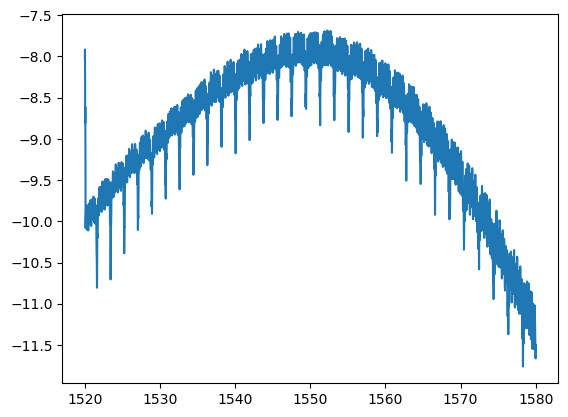

In [2]:
data_analyse_file="sg_rr_52_025 2023-12-11 18-30-06.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

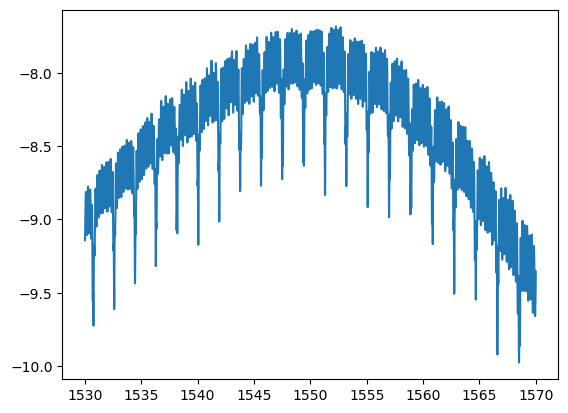

1530.0
1570.0


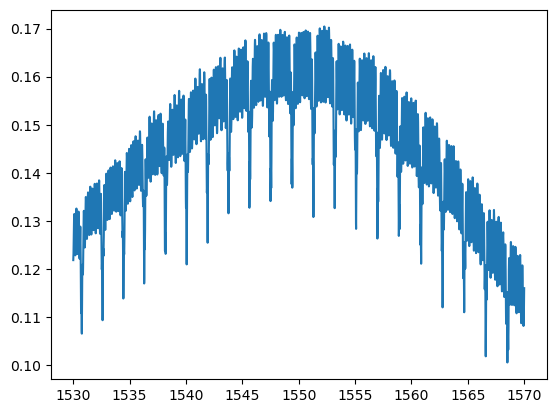

[0.12184578 0.12241019 0.12314596 ... 0.11198846 0.11439734 0.11600999]


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index] #selects wavelengths to search through
power_peak_search_dBm=pow_array[start_point_index:end_point_index] # selects powers to search though
power_peak_search=daf.vector_dBm_to_mW(power_peak_search_dBm) #converts powers to mW
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])
plt.plot(wvlen_peak_search,power_peak_search)
plt.show()
print(power_peak_search)

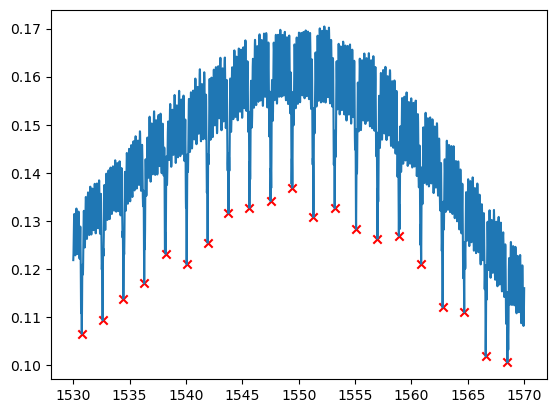

21
[1530.76, 1532.6, 1534.44, 1536.29, 1538.19, 1540.06, 1541.92, 1543.77, 1545.63, 1547.5, 1549.43, 1551.3, 1553.19, 1555.09, 1556.98, 1558.88, 1560.86, 1562.76, 1564.68, 1566.59, 1568.51]


In [4]:
wvlen_step_size=0.01
approx_fsr=2
promin_use=0.01
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for check
print(peak_wavelens)#check

In [5]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[1.84 1.84 1.85 1.9  1.87 1.86 1.85 1.86 1.87 1.93 1.87 1.89 1.9  1.89
 1.9  1.98 1.9  1.92 1.91 1.92]
1.8875
0.00784303244253661


Now to calculate peak widths below:

[0.13282279 0.13845096 0.19444336 0.12554885 0.13405929 0.1250474
 0.14567989 0.22070975 0.14587438 0.13962297 0.14400877 0.13699977
 0.22631718 0.14786371 0.14768026 0.14434187 0.13982756 0.13644627
 0.15350052 0.14252828 0.15199127]


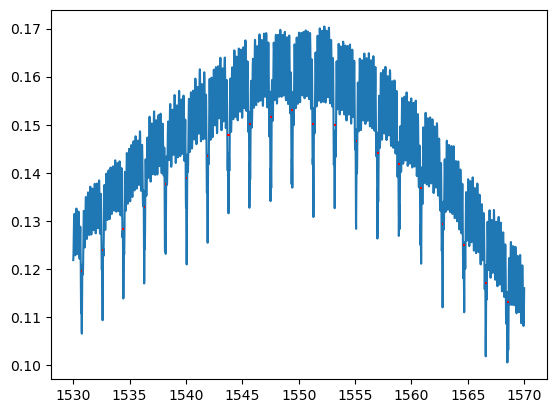

In [6]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [7]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)

0.15113167203121702
0.00606021124500807


Now to to calculate Q factor, and its error, and Q^3/R^2, and its error.

In [8]:
Q_factor_list=peak_wavelens/peak_widths
mean_Q_factor,Q_factor_error=daf.fsr_avg_and_error(Q_factor_list)
print(mean_Q_factor)
print(Q_factor_error)


10509.339623921429
323.17436740347665


In [9]:
radius=36
radius_error=0.1
Qcubed_over_Rsquared,Qcubed_over_Rsquared_error=daf.calc_Q3overR2(mean_Q_factor,Q_factor_error,radius,radius_error)
print(Qcubed_over_Rsquared)
print(Qcubed_over_Rsquared_error)

895614837.289203
82773263.42670237
